In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [89]:
df=pd.read_excel('/content/drive/MyDrive/DataScience-Datasets/random_forest_dataset.xlsx')

In [90]:
df.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Sl No,USN,Name,Title,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total,Grade
1,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85,34,93,18.6,13,4,35.6,85.2,A
2,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82,32.8,77,15.4,15,5,35.4,85,A


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   118 non-null    object
 1   Unnamed: 1   118 non-null    object
 2   Unnamed: 2   118 non-null    object
 3   Unnamed: 3   117 non-null    object
 4   Unnamed: 4   118 non-null    object
 5   Unnamed: 5   118 non-null    object
 6   Unnamed: 6   118 non-null    object
 7   Unnamed: 7   118 non-null    object
 8   Unnamed: 8   118 non-null    object
 9   Unnamed: 9   118 non-null    object
 10  Unnamed: 10  110 non-null    object
 11  Unnamed: 11  110 non-null    object
 12  Unnamed: 12  118 non-null    object
 13  Unnamed: 13  118 non-null    object
 14  Unnamed: 14  110 non-null    object
dtypes: object(15)
memory usage: 14.0+ KB


In [92]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,118,118,118,117,118,118.0,118,118,118,118.0,110,110,118,118,110
unique,118,118,118,116,30,30.0,28,29,27,28.0,7,7,45,66,5
top,Sl No,USN,Name,Development of Streamlined Data Storage Process,91,18.2,80,32,94,18.8,14,4,0,0,A
freq,1,1,1,2,12,12.0,13,13,12,12.0,38,43,8,8,48


In [93]:
df = df.drop(0, axis=0)

In [94]:
df.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85,34,93,18.6,13,4,35.6,85.2,A
2,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82,32.8,77,15.4,15,5,35.4,85,A
3,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82,32.8,88,17.6,13,1,31.6,81.2,A


In [95]:
df.shape

(117, 15)

In [96]:
df.isnull().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     1
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    8
Unnamed: 11    8
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    8
dtype: int64

In [97]:
df['Unnamed: 10']=pd.to_numeric(df['Unnamed: 10'],errors='coerce')
df['Unnamed: 11']=pd.to_numeric(df['Unnamed: 11'],errors='coerce')

In [98]:
df.dropna(subset=['Unnamed: 3'],inplace=True)
df['Unnamed: 10']=df['Unnamed: 10'].fillna(df['Unnamed: 10'].mean())
df['Unnamed: 11']=df['Unnamed: 11'].fillna(df['Unnamed: 11'].mean())
df.dropna(subset=['Unnamed: 14'],inplace=True)

In [99]:
df.isnull().sum()

Unnamed: 0     0
Unnamed: 1     0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
dtype: int64

In [100]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,1,1RV21MC001,ABHISHEK M,Generative AI Prompt Pipeline,78,15.6,85,34,93,18.6,13.0,4.0,35.6,85.2,A
2,2,1RV21MC002,ABHISHEK RANJANAGOUDA G,Android based Smart Vehicle Parking System usi...,84,16.8,82,32.8,77,15.4,15.0,5.0,35.4,85,A
3,3,1RV21MC003,ADARSH V MORYE,Sentimental Analysis for product ratings,84,16.8,82,32.8,88,17.6,13.0,1.0,31.6,81.2,A
4,4,1RV21MC004,AISHWARYA K KAMBLE,Analysis and Deployment of an efficient Deep L...,88,17.6,85,34,96,19.2,13.0,4.0,36.2,87.8,A
5,5,1RV21MC005,AISHWARYA NAGARAJ BABALESHWAR,Development of Deep Learning Model for Varied ...,84,16.8,82,32.8,77,15.4,15.0,5.0,35.4,85,A


In [101]:
x=df.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 14'],axis=1)
y=df['Unnamed: 14']

In [102]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.2)

In [103]:
rfc=RandomForestClassifier(n_estimators=10,random_state=42)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10, random_state=42)

In [104]:
ypred=rfc.predict(xtest)

In [105]:
accuracy=accuracy_score(ytest,ypred)
print('Accuracy: %.2f'%accuracy)

Accuracy: 0.59


In [106]:
classificationReport=classification_report(ytest,ypred)
classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [107]:
confusionMatrix=confusion_matrix(ytest,ypred)

<Axes: >

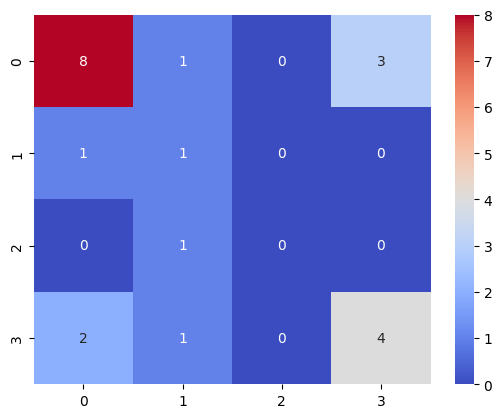

In [108]:
sns.heatmap(confusionMatrix,annot=True,cmap='coolwarm')

In [113]:
test_data=rfc.predict([[5,10,15,20,25,30,35,40,45,50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [112]:
test_data[0]

'C'

In [114]:
test_data=rfc.predict([[95,80,66,70,65,30,35,40,45,50]])
test_data[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'A'

In [116]:
unique_values_list = df['Unnamed: 14'].unique().tolist()

In [117]:
unique_values_list

['A', 'S', 'B', 'C']